# Working on mnist dataset 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices("GPU")

[]

In [3]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras
mnist=tf.keras.datasets.mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
# X_valid, X_train = X_train_full[:5000], X_train_full[5000:]

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.
# X_test = X_test

In [8]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

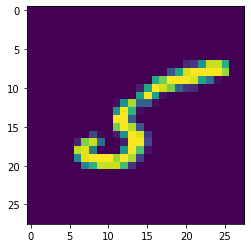

In [9]:
plt.imshow(X_train_full[11])

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

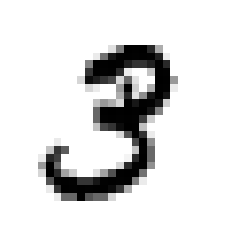

In [13]:
plt.imshow(X_train[1], cmap="binary")
plt.axis("off")


<AxesSubplot:>

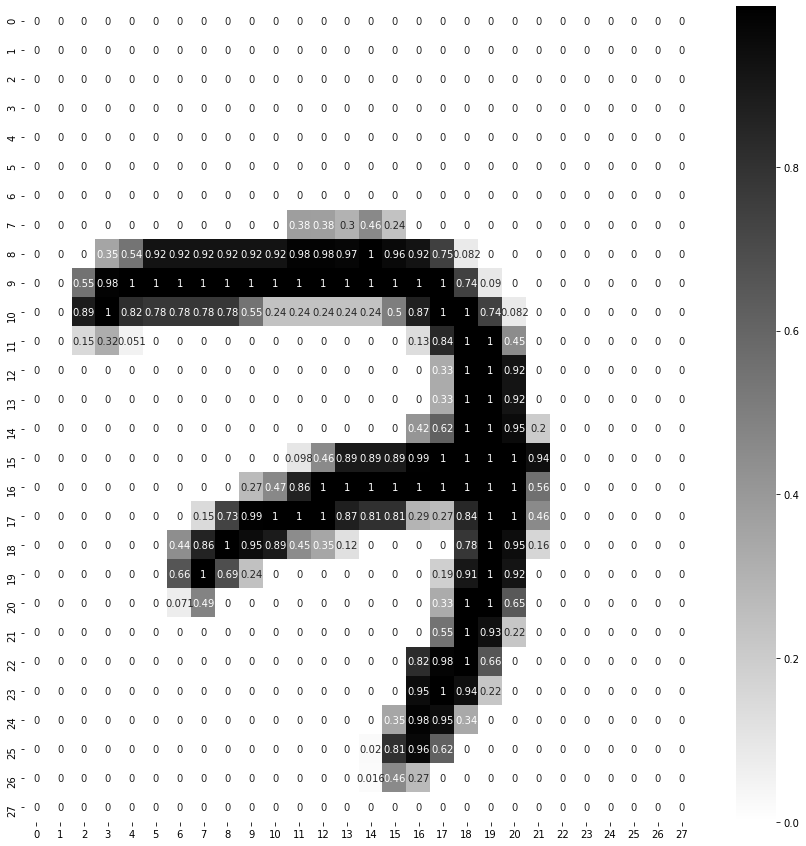

In [14]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [15]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

In [16]:
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.layers

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

In [19]:

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [20]:
import time
import os

def get_log_path(log_dir="logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at: {log_path}")
    return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
CKPT_path = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

saving logs at: logs/fit\log_2021_10_02_11_45_16


In [21]:
# EPOCHS = 30
EPOCHS = 50

# EPOCHS = 200

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])

Epoch 1/50
   1/1719 [..............................] - ETA: 0s - loss: 2.3449 - accuracy: 0.0938WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5898 - accuracy: 0.8509 - val_loss: 0.2965 - val_accuracy: 0.9200
Epoch 2/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2827 - accuracy: 0.9189 - val_loss: 0.2339 - val_accuracy: 0.9358
Epoch 3/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2313 - accuracy: 0.9343 - val_loss: 0.2002 - val_accuracy: 0.9424
Epoch 4/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1978 - accuracy: 0.9435 - val_loss: 0.1724 - val_accuracy: 0.9498
Epoch 5/50
1719/1719 [==============================] - 

In [22]:
import time
import os
def savemodel_path(model_dir='Trained_model'):
        os.makedirs(model_dir,exist_ok=True)
        fileName=time.strftime("model_%Y_%m_d_%H_%M_%S.h5")
        model_path=os.path.join(model_dir,fileName)
        print(f"your model {fileName} is save at {model_path}")
        return model_path

In [23]:
path=savemodel_path()
path

your model model_2021_10_d_11_51_20.h5 is save at Trained_model\model_2021_10_d_11_51_20.h5


'Trained_model\\model_2021_10_d_11_51_20.h5'

In [24]:
tf.keras.models.save_model(model_clf,path)

In [25]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.589795,0.850873,0.296488,0.9200
1,0.282700,0.918855,0.233866,0.9358
2,0.231348,0.934345,0.200176,0.9424
3,0.197771,0.943455,0.172449,0.9498
4,0.172517,0.951018,0.156007,0.9548
5,0.153037,0.956564,0.141938,0.9582
6,0.137181,0.960855,0.129186,0.9624
7,0.124155,0.964891,0.120559,0.9654
8,0.113086,0.968036,0.115490,0.9648
9,0.104340,0.970418,0.109532,0.9676


<AxesSubplot:>

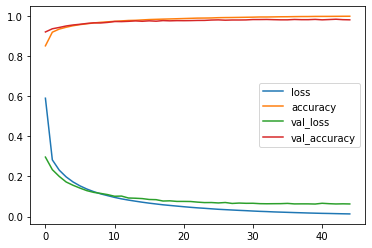

In [26]:
pd.DataFrame(history.history).plot()



In [27]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9794


[0.06745710223913193, 0.9793999791145325]

In [28]:
new=X_test[:4]

In [29]:
y_pred=model_clf.predict(new).round(2)
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_new=np.argmax(y_pred,axis=-1)


In [31]:
#how zip is working
a=[1,2,3,4]
b=[2,4,6,8]
c=[3,6,9,12]
list(zip(a,b,c))

[(1, 2, 3), (2, 4, 6), (3, 6, 9), (4, 8, 12)]

In [32]:
for x,y,z in zip(a,b,c):
    print(x,y,z)

1 2 3
2 4 6
3 6 9
4 8 12


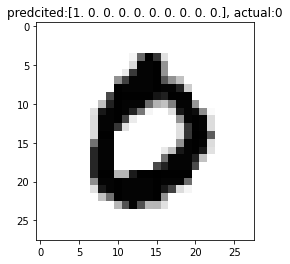

In [33]:
for data,pred,actual in zip(new,y_pred,y_new):
    plt.imshow(data,cmap='binary')
    plt.title(f"predcited:{pred}, actual:{actual}")

In [38]:
loadmodel=tf.keras.models.load_model('Trained_model/Model_2021_10_02_12_01_29_.h5')

In [39]:
loadmodel.evaluate(X_train,y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.0991


[0.025210076943039894, 0.09914545714855194]

# tensor board

In [45]:
import time
def get_logpath(log_dir='log/fit'):
    filename=time.strftime("log_%Y_%m_%d_%H_%M_%S")
    model_path=os.path.join(log_dir,filename)
    print(f"saving model as {model_path} and name is {filename}")
    return model_path
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)


In [46]:
# EPOCHS = 30
EPOCHS = 10

# EPOCHS = 200

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0163 - accuracy: 0.9975 - val_loss: 0.0646 - val_accuracy: 0.9824
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0154 - accuracy: 0.9979 - val_loss: 0.0635 - val_accuracy: 0.9822
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0146 - accuracy: 0.9979 - val_loss: 0.0622 - val_accuracy: 0.9814
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0629 - val_accuracy: 0.9816
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9985 - val_loss: 0.0627 - val_accuracy: 0.9820
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0127 - accuracy: 0.9984 - val_loss: 0.0644 - val_accuracy: 0.9812
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9987 - val_loss: 0.0643 - val_accuracy

In [47]:
%load_ext tensorboard 

In [50]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4904), started 0:01:30 ago. (Use '!kill 4904' to kill it.)

In [49]:
%ls

 Volume in drive D is HDD Window
 Volume Serial Number is F60C-9FEC

 Directory of D:\Project\IN

10/02/2021  12:20 PM    <DIR>          .
10/02/2021  12:20 PM    <DIR>          ..
10/02/2021  11:57 AM    <DIR>          .ipynb_checkpoints
10/02/2021  12:20 PM           170,231 1. A simple classifier using Keras's Sequential API.ipynb
06/26/2021  10:44 PM             4,532 Data cleaning assignment.ipynb
06/26/2021  10:38 PM             2,360 Exception handling Assignment.ipynb
10/02/2021  12:09 PM           182,661 live demo.ipynb
09/30/2021  08:15 PM    <DIR>          logs
10/02/2021  12:19 PM         1,085,440 model_ckpt.h5
10/02/2021  12:01 PM    <DIR>          Trained_model
               5 File(s)      1,445,224 bytes
               5 Dir(s)  89,091,375,104 bytes free
